In [1]:
import pandas as pd
import random
import os
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import mean_squared_error

In [2]:
def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
seed_everything(42) # Seed 고정

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
train_df = pd.read_csv('./drive/MyDrive/LG_Aimer/train.csv')

train_x = train_df.filter(regex='X') # Input : X Featrue
train_y = train_df.filter(regex='Y') # Output : Y Feature

In [5]:
df = pd.read_csv('./drive/MyDrive/LG_Aimer/train.csv')
df.head()

,ID,X_01,X_02,X_03,X_04,X_05,X_06,X_07,X_08,X_09,...,Y_05,Y_06,Y_07,Y_08,Y_09,Y_10,Y_11,Y_12,Y_13,Y_14
0,TRAIN_00001,70.544,103.320,67.47,1,101.892,74.983,29.45,62.38,245.71,...,29.632,16.083,4.276,-25.381,-25.529,-22.769,23.792,-25.470,-25.409,-25.304
1,TRAIN_00002,69.524,103.321,65.17,1,101.944,72.943,28.73,61.23,233.61,...,33.179,16.736,3.229,-26.619,-26.523,-22.574,24.691,-26.253,-26.497,-26.438
2,TRAIN_00003,72.583,103.320,64.07,1,103.153,72.943,28.81,105.77,272.20,...,31.801,17.080,2.839,-26.238,-26.216,-22.169,24.649,-26.285,-26.215,-26.370
3,TRAIN_00004,71.563,103.320,67.57,1,101.971,77.022,28.92,115.21,255.36,...,34.503,17.143,3.144,-25.426,-25.079,-21.765,24.913,-25.254,-25.021,-25.345
4,TRAIN_00005,69.524,103.320,63.57,1,101.981,70.904,29.68,103.38,241.46,...,32.602,17.569,3.138,-25.376,-25.242,-21.072,25.299,-25.072,-25.195,-24.974


In [6]:
cor = df.corr(method='pearson')
cor

,X_01,X_02,X_03,X_04,X_05,X_06,X_07,X_08,X_09,X_10,...,Y_05,Y_06,Y_07,Y_08,Y_09,Y_10,Y_11,Y_12,Y_13,Y_14
X_01,1.000000,-0.084611,0.211988,NaN,0.553974,0.626521,-0.008373,0.007622,-0.033579,0.011021,...,0.011155,-0.007630,-0.038733,0.071421,0.066141,0.034081,0.009947,0.066904,0.068074,0.067083
X_02,-0.084611,1.000000,-0.028076,NaN,-0.048915,-0.047862,-0.003771,-0.001676,0.002720,-0.001047,...,-0.008923,-0.005153,0.003732,-0.013776,-0.014633,-0.008553,-0.007557,-0.013885,-0.013285,-0.013482
X_03,0.211988,-0.028076,1.000000,NaN,-0.076944,0.407266,0.011814,0.007182,-0.065713,-0.005502,...,0.002662,-0.029823,-0.022002,0.120045,0.108622,0.107851,0.034114,0.111755,0.112385,0.109578
X_04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
X_05,0.553974,-0.048915,-0.076944,NaN,1.000000,0.104653,-0.032107,-0.005577,-0.009923,-0.001577,...,-0.001100,0.016569,-0.019453,0.035862,0.033445,0.001554,0.013407,0.033491,0.034294,0.034546
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Y_10,0.034081,-0.008553,0.107851,NaN,0.001554,0.060159,-0.017691,0.008864,0.042074,-0.011320,...,0.524548,0.699676,-0.385954,0.816150,0.805977,1.000000,0.809518,0.811730,0.810557,0.810940
Y_11,0.009947,-0.007557,0.034114,NaN,0.013407,0.012831,-0.002733,-0.008115,-0.002887,-0.018341,...,0.685527,0.410842,-0.604134,0.846365,0.844375,0.809518,1.000000,0.845537,0.843500,0.846400
Y_12,0.066904,-0.013885,0.111755,NaN,0.033491,0.070004,-0.015829,-0.005884,0.003972,-0.017371,...,0.535203,0.414966,-0.400218,0.967685,0.967575,0.811730,0.845537,1.000000,0.979065,0.968542
Y_13,0.068074,-0.013285,0.112385,NaN,0.034294,0.069610,-0.016125,-0.007206,0.005898,-0.018241,...,0.533051,0.414371,-0.396800,0.967492,0.967353,0.810557,0.843500,0.979065,1.000000,0.968822


In [7]:
xycor = cor.drop(columns=['X_04', 'X_23', 'X_47', 'X_48']).filter(regex='X').filter(regex='Y', axis=0)

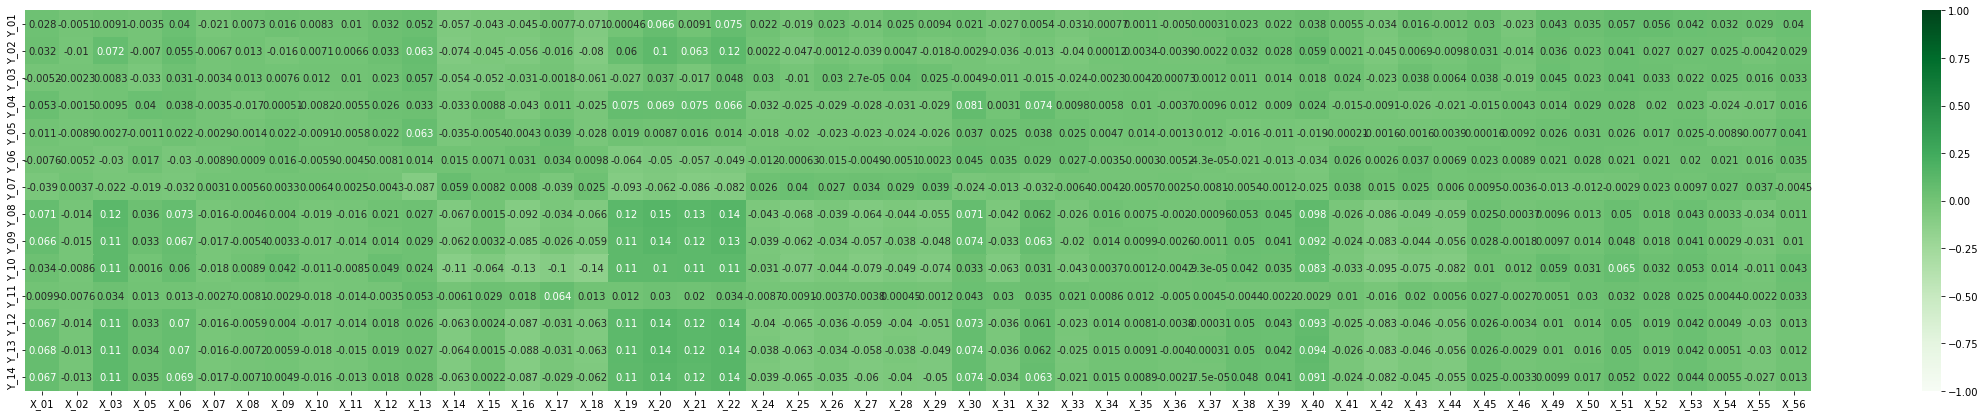

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (40,7)
sns.heatmap(xycor,
           annot = True, #실제 값 화면에 나타내기
           cmap = 'Greens', #색상
           vmin = -1, vmax=1 , #컬러차트 영역 -1 ~ +1
          )